In [1]:
%matplotlib inline

#Load required modules
import sys, os, argparse
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.graphics.boxplots import violinplot
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')

### Set up seaborn appearence
mpl.rc('text', usetex = True)
sns.set_context("notebook", font_scale=1.5)
colors= [ "#d1fffc", "#00ada4", "#edc9ff", "#ae00ff", "#ffc18c", "#d66300"]
sns.set_palette(colors)
pc_map = {'mS':0, 'pS': 1, 'mM': 2, 'pM': 3, 'mR': 4, 'pR': 5}
plt.rc("axes.spines", top=True, right=True)

In [20]:
# import data
files_new_m5=['machina/results_MACHINA_m5.txt', 'neighbor_joining/results_m5.txt', 
              'treeomics/results_m5_noSub.txt', 'treeomics/results_m5_sub.txt',
              'ancestree/results_m5.txt', 'phylosub/results_m5.txt',
              'machina/results_MACHINA_clomial_m5.txt', 'machina/results_MACHINA_phylowgs_m5.txt',
              'machina/results_MACHINA_pyclone_m5.txt', 'machina/results_MACHINA_sciclone_m5.txt']
files_new_m8=['machina/results_MACHINA_m8.txt', 'neighbor_joining/results_m8.txt', 
              'treeomics/results_m8_noSub.txt', 'treeomics/results_m8_sub.txt',
              'ancestree/results_m8.txt', 'phylosub/results_m8.txt',
              'machina/results_MACHINA_clomial_m8.txt', 'machina/results_MACHINA_phylowgs_m8.txt',
              'machina/results_MACHINA_pyclone_m8.txt', 'machina/results_MACHINA_sciclone_m8.txt']
res_m5 = pd.concat([pd.read_csv(filename) for filename in files_new_m5]).reindex()
res_m8 = pd.concat([pd.read_csv(filename) for filename in files_new_m8]).reindex()
res_m5 = res_m5[(res_m5['enforced']=='R') | (res_m5['enforced'].isnull())]
res_m8 = res_m8[(res_m8['enforced']=='R') | (res_m8['enforced'].isnull())]

res_m5 = res_m5.replace({'pattern': {'S': 'pS', 'M' : 'pM', 'R' : 'pR'}})
res_m8 = res_m8.replace({'pattern': {'S': 'pS', 'M' : 'pM', 'R' : 'pR'}})

res_m8_MACHINA = res_m8[res_m8['method'] == 'MACHINA'].replace({'inferred': {'pPS': 'pS', 'mPS' : 'mS'}})

res_m5_MACHINA = res_m5[res_m5['method'] == 'MACHINA'].replace({'inferred': {'pPS': 'pS', 'mPS' : 'mS'}})
res_m8_MACHINA = res_m8[res_m8['method'] == 'MACHINA'].replace({'inferred': {'pPS': 'pS', 'mPS' : 'mS'}})

In [21]:
# Create proportion bar plot

r = []
def normalize(x):
    return float(x['seed'])/sum(r.loc[x.name[0]]['seed'])

def plot_proportions(results, filename):
    global r
    fig = plt.figure(figsize=(7,12))
    gs = mpl.gridspec.GridSpec(5, 1, height_ratios=[1,7,7,7,7])
    
    norm = mpl.colors.Normalize(vmin=min(results['RF']), vmax=max(results['RF']))

    cb1 = mpl.colorbar.ColorbarBase(plt.subplot(gs[0]), cmap=plt.get_cmap('YlGnBu'),
                                    norm=norm,
                                    orientation='horizontal',
                                    boundaries=range(min(results['RF']),max(results['RF'] + 1)))
    
    cb1.set_ticks(np.arange(0, max(results['RF'])+1, 2.0))
    
    plt.subplot(gs[0]).set_title("Robinson-Foulds distance")
    
    for i,v in enumerate(['mS', 'pS', 'pM', 'pR']):
        r = results[results['pattern'] == v].groupby(['method', 'RF']).count()
        r['norm'] = r.apply( normalize, axis = 1)
        #r.reset_index().sort_values(['method', 'RF'])
        ax = plt.subplot(gs[i+1])
        
        r['norm'].unstack(level=-1).plot.barh(stacked=True, colormap = 'YlGnBu', ax=ax, legend=False)

        ax.set_xlim(0,1.01)
        ax.set_xticks(np.arange(0, 1.05, .1))
        ax.set_ylim(reversed(ax.get_ylim())) # Reverse the order of the methods to match the ohe
        plt.ylabel(v, rotation=0, size=25, labelpad=30)

        if i == 3:
            ax.set_xlabel("proportion")
            
    plt.tight_layout()
    plt.savefig(filename)
    # plt.close()

In [22]:
#plot_proportions(res_m5, "proportions_m5.pdf")

In [23]:
#plot_proportions(res_m8, "proportions_m8.pdf")

In [58]:
def distance_boxplots(results, filename, methods):
    for i,v in enumerate(['mS', 'pS', 'pM', 'pR']):
        r = results[results['pattern'] == v]

        plt.subplot(4,1,i+1)

        clr = sns.color_palette()[pc_map[v]]
        sns.boxplot(data = r,  x = 'RF', y = 'method', order=methods, showfliers=False, palette=[clr, clr, clr, clr])
        sns.stripplot(data = r, jitter=0.15, x = 'RF', y = 'method', order=methods, color=".3", alpha=0.6)
        plt.gcf().set_size_inches(7, 12)
        plt.ylabel(v, rotation=0, size=25, labelpad=30)
        plt.xlim((-1,max(results['RF'])+1))
        plt.xticks(np.arange(0, max(results['RF'])+1, 2.0))
        if i == 3:
            plt.xlabel("clone tree distance")
        else: 
            plt.xlabel("")

    plt.tight_layout()
    plt.savefig(filename)
#     plt.close()
    
    
def distance_boxplots_square(results, filename, methods):
    for i,v in enumerate(['mS', 'pS', 'pM', 'pR']):
        r = results[results['pattern'] == v]

        plt.subplot(2,2,i+1)

        clr = sns.color_palette()[pc_map[v]]
        sns.boxplot(data = r,  x = 'RF', y = 'method', order=methods, showfliers=False, palette=[clr, clr, clr, clr])
        sns.stripplot(data = r, jitter=0.15, x = 'RF', y = 'method', order=methods, color=".3", alpha=0.6, clip_on=False)
        plt.gcf().set_size_inches(10, 7)
        plt.ylabel("")#v, rotation=0, size=25, labelpad=30)
        #plt.title(v)
        plt.xlim(0, (max(results['RF'])))
        plt.xticks(np.arange(0, max(results['RF'])+1, 2.0))
        if i in [1,3]:
            plt.yticks([],[])
        if i in [2,3]:
            plt.xlabel("clone tree distance")
        else: 
            plt.xlabel("")

    plt.tight_layout()
    plt.savefig(filename)
#     plt.close()

def distance_boxplots_row(results, filename, methods):
    for i,v in enumerate(['mS', 'pS', 'pM', 'pR']):
        r = results[results['pattern'] == v]

        plt.subplot(1,4,i+1)

        clr = sns.color_palette()[pc_map[v]]
        sns.boxplot(data = r,  x = 'RF', y = 'method', order=methods, showfliers=False, palette=[clr, clr, clr, clr])
        sns.stripplot(data = r, jitter=0.15, x = 'RF', y = 'method', order=methods, color=".3", alpha=0.6)
        plt.gcf().set_size_inches(13, 4)
        plt.ylabel("")#v, rotation=0, size=25, labelpad=30)
        #plt.title(v)
        plt.xlim((-1,max(results['RF'])+1))
        plt.xticks(np.arange(0, max(results['RF'])+1, 3.0))
        if i != 0:
            plt.yticks([],[])
        plt.xlabel("clone tree distance")

    plt.tight_layout()
    plt.savefig(filename)

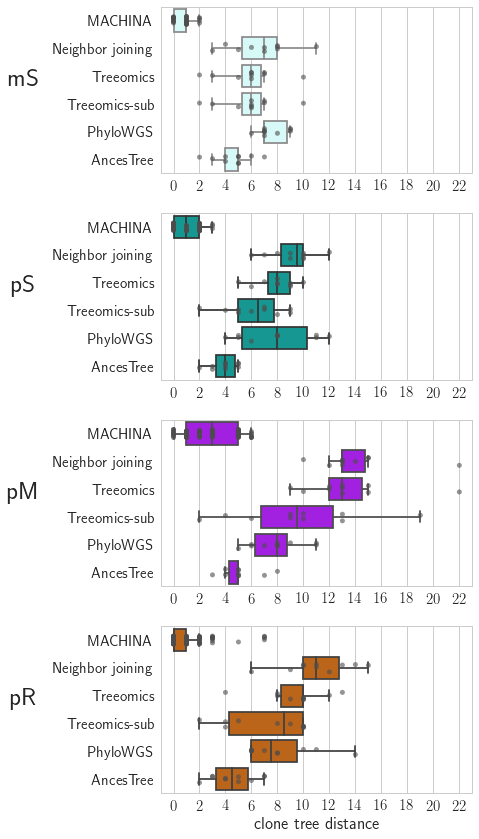

In [31]:
distance_boxplots(res_m5.replace({'method': {'PhyloWGS 5': 'PhyloWGS'}}),"m5_RF_results.pdf", 
                         ["MACHINA", "Neighbor joining", "Treeomics", "Treeomics-sub",
                          "PhyloWGS", "AncesTree"])

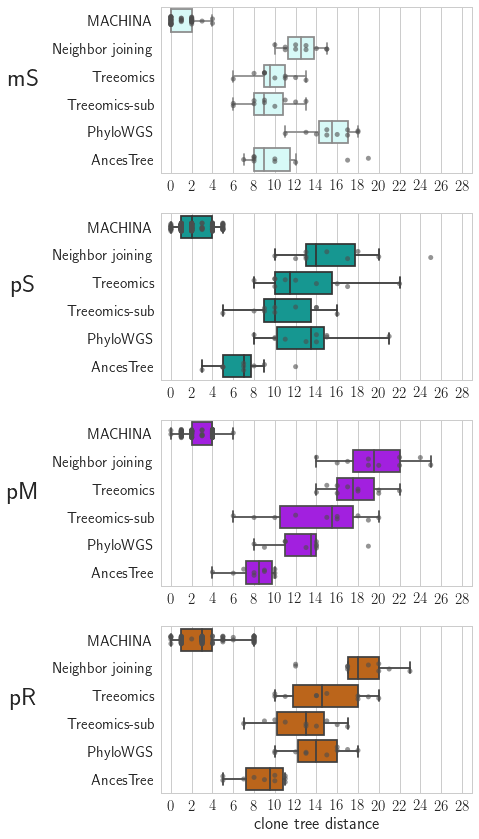

In [32]:
distance_boxplots(res_m8.replace({'method': {'PhyloWGS 5': 'PhyloWGS'}}), "m8_RF_results.pdf", 
                         ["MACHINA", "Neighbor joining", "Treeomics", "Treeomics-sub",
                          "PhyloWGS", "AncesTree"])

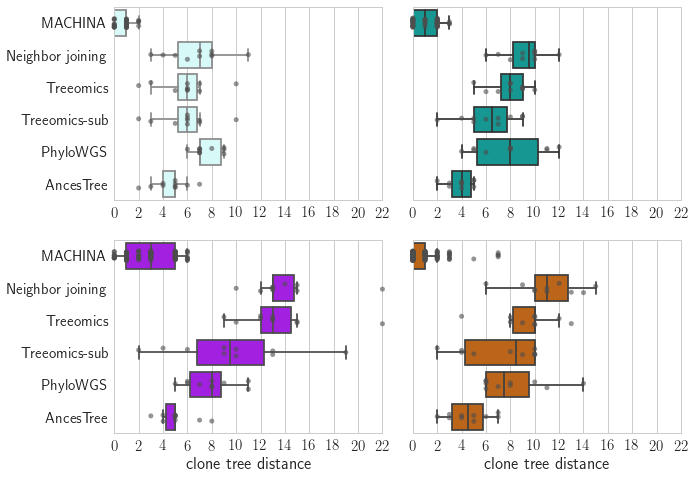

In [59]:
distance_boxplots_square(res_m5.replace({'method': {'PhyloWGS 5': 'PhyloWGS'}}),"m5_RF_results_square.pdf", 
                         ["MACHINA", "Neighbor joining", "Treeomics", "Treeomics-sub",
                          "PhyloWGS", "AncesTree"])

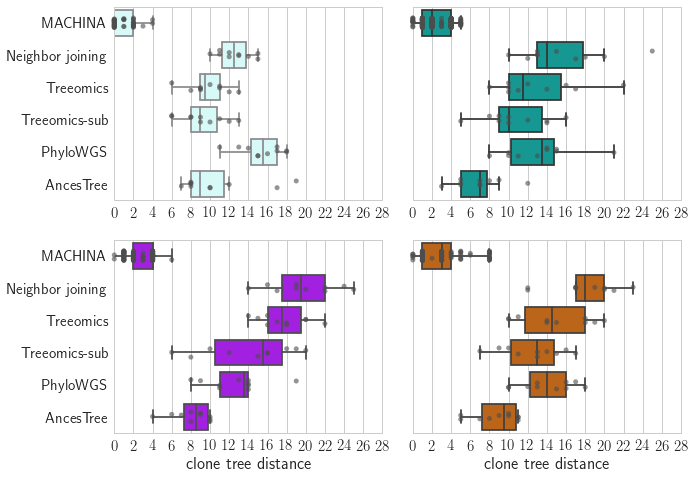

In [60]:
distance_boxplots_square(res_m8.replace({'method': {'PhyloWGS 5': 'PhyloWGS'}}), "m8_RF_results_square.pdf", 
                         ["MACHINA", "Neighbor joining", "Treeomics", "Treeomics-sub",
                          "PhyloWGS", "AncesTree"])

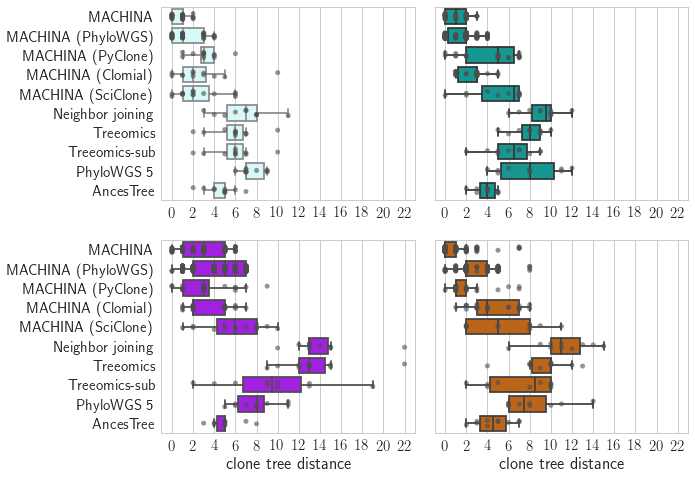

In [35]:
distance_boxplots_square(res_m5,"m5_RF_results_clustering_square.pdf", 
                         ["MACHINA", "MACHINA (PhyloWGS)", "MACHINA (PyClone)",
                          "MACHINA (Clomial)", "MACHINA (SciClone)", 
                          "Neighbor joining", "Treeomics", "Treeomics-sub",
                          "PhyloWGS 5", "AncesTree" ])

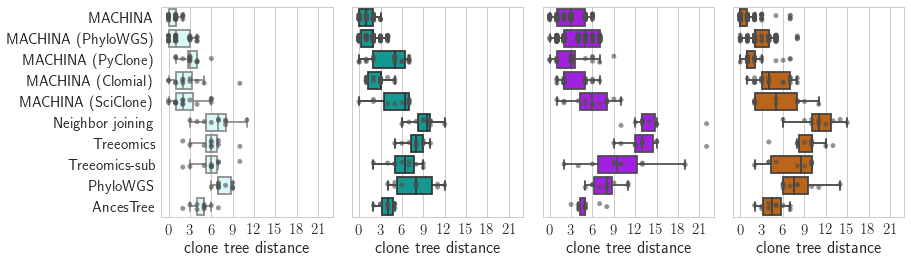

In [36]:
distance_boxplots_row(res_m5.replace({'method': {'PhyloWGS 5': 'PhyloWGS'}}), "m5_RF_results_clustering_row.pdf", 
                         ["MACHINA", "MACHINA (PhyloWGS)", "MACHINA (PyClone)",
                          "MACHINA (Clomial)", "MACHINA (SciClone)", 
                          "Neighbor joining", "Treeomics", "Treeomics-sub",
                          "PhyloWGS", "AncesTree" ])

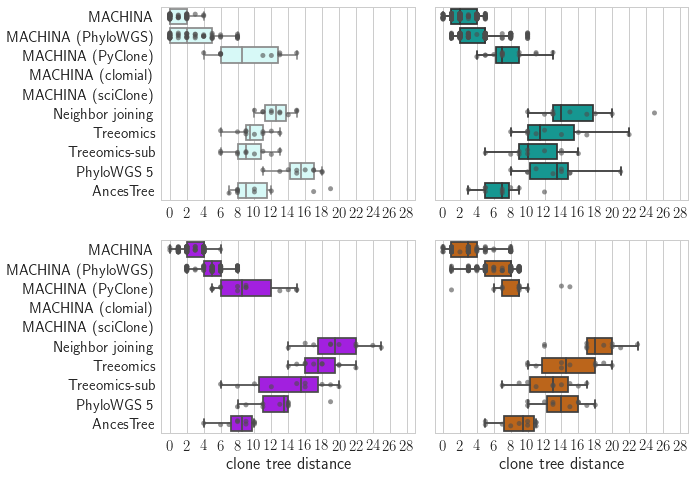

In [37]:
distance_boxplots_square(res_m8,"m8_RF_results_clustering_square.pdf", 
                         ["MACHINA", "MACHINA (PhyloWGS)", "MACHINA (PyClone)",
                          "MACHINA (clomial)", "MACHINA (sciClone)", 
                          "Neighbor joining", "Treeomics", "Treeomics-sub",
                          "PhyloWGS 5", "AncesTree" ])

## Migrating clones

In [38]:
def plot_clone_scores_multi(res, filename, methods):
    r = res.groupby(['pattern','seed', 'method'])['FscoreT'].mean().to_frame("FscoreT").reset_index(level=['pattern','method'])
    order = ['mS', 'pS', 'pM', 'pR']
    colors = [sns.color_palette()[pc_map[i]] for i in order] 
    ax = sns.boxplot(data = r,  y = 'FscoreT', x = 'method', order=methods, hue='pattern',hue_order = order, showfliers=False, palette = colors)
    ax.legend_.remove()
    #ax = sns.stripplot(data = r, jitter=0.15, y = 'FscoreT', x = 'method', order=methods, hue='pattern', hue_order = order, color=".3", alpha=0.6)
    plt.gcf().set_size_inches(10, 3)
    plt.ylim(0, 1.07)
    ax.set_xlabel("")
    ax.set_ylabel("migrating clones $F_1$ score")
    for label in ax.get_xticklabels():
        label.set_rotation(30)
    plt.savefig(filename, bbox_inches="tight")

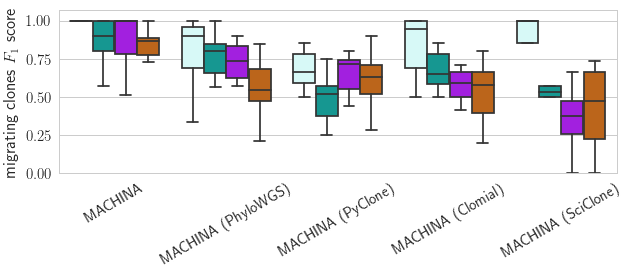

In [39]:
plot_clone_scores_multi(res_m5, "m5_migration_clones_multi.pdf", 
                        ['MACHINA', 'MACHINA (PhyloWGS)', 'MACHINA (PyClone)', 'MACHINA (Clomial)', 'MACHINA (SciClone)'])

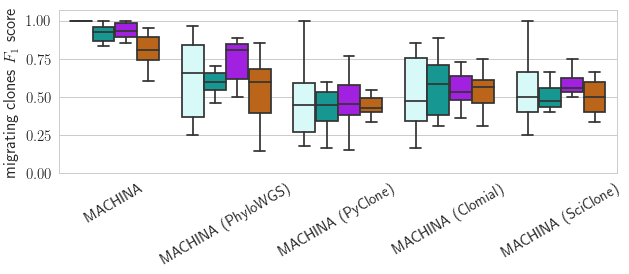

In [40]:
plot_clone_scores_multi(res_m8, "m8_migration_clones_multi.pdf", 
                        ['MACHINA', 'MACHINA (PhyloWGS)', 'MACHINA (PyClone)', 'MACHINA (Clomial)', 'MACHINA (SciClone)'])

In [107]:
def plot_clone_scores(res, filename):
    r = res.groupby(['pattern','seed'])['FscoreT'].mean().to_frame("FscoreT").reset_index(level=0)
    order = ['mS', 'pS', 'pM', 'pR']
    colors = [sns.color_palette()[pc_map[i]] for i in order] 
    sns.boxplot(data = r,  y = 'FscoreT', x = 'pattern', order = order, showfliers=False, palette = colors)
    ax = sns.stripplot(data = r, jitter=0.15, y = 'FscoreT', x = 'pattern', order = ['mS', 'pS', 'pM', 'pR'], color=".3", alpha=0.6, clip_on = False)
    plt.gcf().set_size_inches(4.5, 3)
    plt.ylim(0, 1.001)
    ax.set_xlabel("")
    ax.set_ylabel("migrating clones \n$F_1$ score")
    plt.yticks([0,0.2, 0.4, 0.6, 0.8, 1.001], ['0','0.2','0.4','0.6', '0.8', '1'])
    plt.savefig(filename, bbox_inches="tight")
    #plt.close()

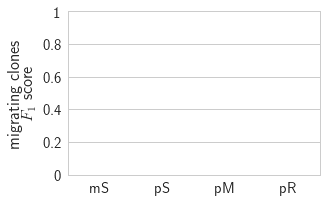

In [108]:
plot_clone_scores(res_m5[res_m5["method"] == "MACHINA PyClone"], "m5_migration_clones_PyClone.pdf")

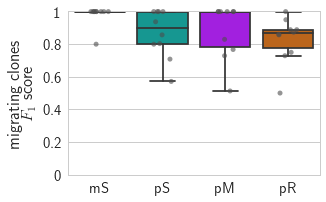

In [109]:
plot_clone_scores(res_m5_MACHINA, "m5_migration_clones.pdf")

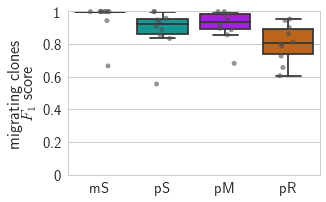

In [110]:
plot_clone_scores(res_m8_MACHINA, "m8_migration_clones.pdf")

## Migration graph

In [45]:
def plot_graph_scores_multi(res, filename, methods):
    r = res.groupby(['pattern','seed', 'method'])['FscoreMultiG'].mean().to_frame("FscoreMultiG").reset_index(level=['pattern','method'])
    order = ['mS', 'pS', 'pM', 'pR']
    colors = [sns.color_palette()[pc_map[i]] for i in order] 
    ax = sns.boxplot(data = r,  y = 'FscoreMultiG', x = 'method', order=methods, hue='pattern',hue_order = order, showfliers=False, palette = colors)
    ax.legend_.remove()
    #ax = sns.stripplot(data = r, jitter=0.15, y = 'FscoreT', x = 'method', order=methods, hue='pattern', hue_order = order, color=".3", alpha=0.6)
    plt.gcf().set_size_inches(10, 3)
    plt.ylim(0, 1.07)
    ax.set_xlabel("")
    ax.set_ylabel("migration graph $F_1$ score")
    for label in ax.get_xticklabels():
        label.set_rotation(30)
    plt.savefig(filename, bbox_inches="tight")

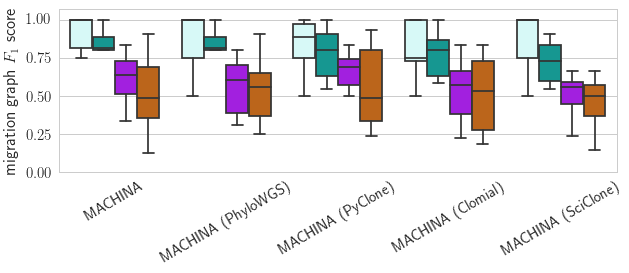

In [46]:
plot_graph_scores_multi(res_m5, "m5_migration_graph_multi.pdf", 
                        ['MACHINA', 'MACHINA (PhyloWGS)', 'MACHINA (PyClone)', 'MACHINA (Clomial)', 'MACHINA (SciClone)'])

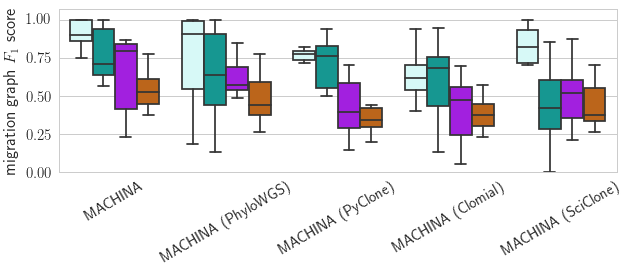

In [47]:
plot_graph_scores_multi(res_m8, "m8_migration_graph_multi.pdf", 
                        ['MACHINA', 'MACHINA (PhyloWGS)', 'MACHINA (PyClone)', 'MACHINA (Clomial)', 'MACHINA (SciClone)'])

In [96]:
def plot_graph_scores(res, filename):
    r = res.groupby(['pattern','seed'])['FscoreMultiG'].mean().to_frame("FscoreMultiG").reset_index(level=0)
    order = ['mS', 'pS', 'pM', 'pR']
    colors = [sns.color_palette()[pc_map[i]] for i in order] 
    sns.boxplot(data = r,  y = 'FscoreMultiG', x = 'pattern', order = ['mS', 'pS', 'pM', 'pR'], showfliers=False, palette = colors)
    ax = sns.stripplot(data = r, jitter=0.15, y = 'FscoreMultiG', x = 'pattern', order = ['mS', 'pS', 'pM', 'pR'], color=".3", alpha=0.6, clip_on = False)
    plt.gcf().set_size_inches(4.5, 3)
    plt.ylim(0, 1.001)
    ax.set_xlabel("")
    ax.set_ylabel("migration graph \n$F_1$ score")
    plt.yticks([0,0.2, 0.4, 0.6, 0.8, 1.001], ['0','0.2','0.4','0.6', '0.8', '1'])
    plt.savefig(filename, bbox_inches="tight")
    #plt.close()

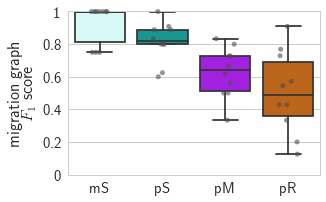

In [97]:
plot_graph_scores(res_m5_MACHINA, "m5_migration_graph.pdf")

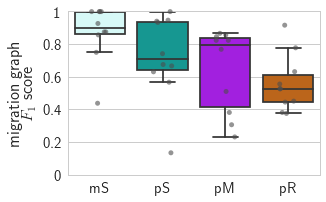

In [98]:
plot_graph_scores(res_m8_MACHINA, "m8_migration_graph.pdf")

In [51]:
def bar_stack(res, filename):
#     print res.head()
    patterns = ['mS', 'pS', 'mM', 'pM', 'mR', 'pR']
    res_MACHINA = res[res['method'] == 'MACHINA'].replace({'inferred': {'pPS': 'pS', 'mPS' : 'mS'}})
    df = res_MACHINA.drop_duplicates(subset=['pattern', 'seed']).groupby(['pattern','inferred'])['pattern'].count().unstack(level=-1).fillna(0).reindex(['mS', 'pS', 'pM', 'pR'])
    for v in patterns:
        if v not in df.columns:
            df[v]=0
    df = df[patterns].reindex(['mS', 'pS', 'pM', 'pR']) 
    df = df.reindex(['mS', 'pS', 'pM', 'pR'])
    ax = df.div(df.sum(axis=1), axis=0).plot(kind='bar', stacked=True, legend=False, edgecolor='k')
    plt.ylim(0,1)
    ax.legend(patterns, ncol=6, loc="upper center", bbox_to_anchor=(0.5, 1.2), title="inferred pattern")
    ax.set_xlabel('simulated pattern')
    ax.set_ylabel('proportion')
    plt.savefig(filename, bbox_inches="tight")

    

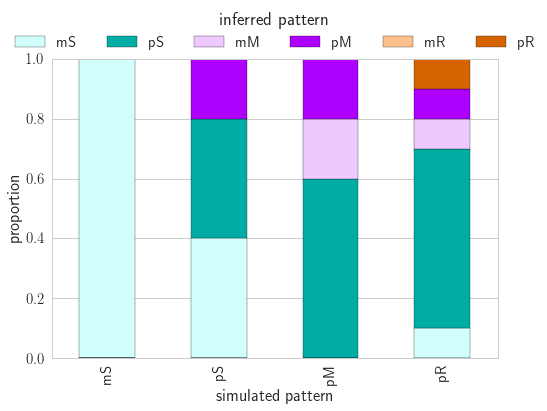

In [52]:
bar_stack(res_m8, "m8_results.pdf")

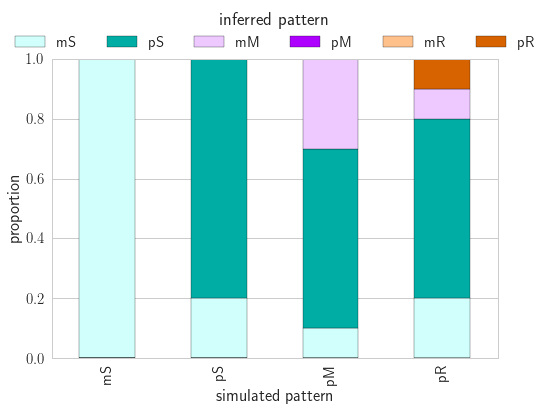

In [53]:
bar_stack(res_m5, "m5_results.pdf")